In [19]:
import pandas as pd
import numpy as np

# Carrega o arquivo CSV
data = pd.read_csv('/Users/vsaroca/Documents/VSCode/Data/EducationalNVCInterventions_2011_2024.csv')

# Extrai o ano de 'published_date' garantindo que todas as entradas sejam tratadas como strings
data['year'] = data['published_date'].astype(str).apply(lambda x: int(x[:4]) if x[:4].isdigit() else None)

# Filtra as linhas onde o ano é NaN e conta o número de artigos publicados por ano
yearly_counts = data.dropna(subset=['year'])['year'].value_counts().sort_index()

# Garante que todos os anos no intervalo do conjunto de dados estejam presentes
all_years = np.arange(2011, 2025)
yearly_counts_complete = yearly_counts.reindex(all_years, fill_value=0)

# Converte para DataFrame para opções de formatação melhores
yearly_counts_df = yearly_counts_complete.reset_index()
yearly_counts_df.columns = ['Ano', 'Publicações']

# Imprime resultado em string formatada e a soma dos trabalhos
print(yearly_counts_df.to_string(index=False))

total_publications = yearly_counts_complete.sum()
print("Trabalhos totais:", total_publications)


 Ano  Publicações
2011            1
2012            0
2013            0
2014            2
2015            2
2016            3
2017            2
2018            4
2019            5
2020            9
2021           12
2022            7
2023            4
2024            1
Trabalhos totais: 52


In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Carrega o arquivo CSV
data = pd.read_csv('/Users/vsaroca/Documents/VSCode/Data/EducationalNVCInterventions_2011_2024.csv')

# Extrai o ano de 'published_date' garantindo que todas as entradas sejam tratadas como strings
data['year'] = data['published_date'].astype(str).apply(lambda x: int(x[:4]) if x[:4].isdigit() else None)

# Filtra as linhas onde o ano é NaN e conta o número de artigos publicados por ano
yearly_counts = data.dropna(subset=['year'])['year'].value_counts().sort_index()

# Garante que todos os anos no intervalo do conjunto de dados estejam presentes
all_years = np.arange(2011, 2025)
yearly_counts_complete = yearly_counts.reindex(all_years, fill_value=0)

# Aqui, adaptaremos o dataset para o modelo, considerando apenas até 2023
total_publications_per_year = yearly_counts_complete.loc[:2023]

# Aplica Suavização Exponencial Simples
model = SimpleExpSmoothing(total_publications_per_year).fit(smoothing_level=0.2, optimized=False)

# Previsão do total de publicações para 2024
forecast_2024 = model.forecast(1)

# Previsão do total de publicações para 2024, arredondando para o número inteiro mais próximo
forecast_2024_rounded = round(forecast_2024.iloc[0])

# Imprime o resultado com uma etiqueta em português e o valor arredondado
print(f"Previsão do total de publicações para 2024: {forecast_2024_rounded}")

import warnings
warnings.filterwarnings('ignore')

Previsão do total de publicações para 2024: 5


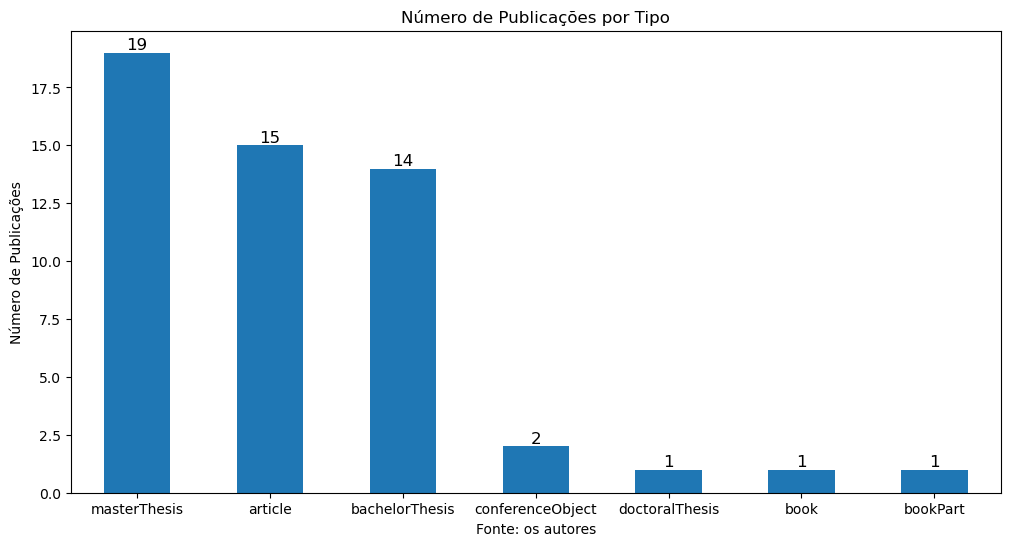

In [21]:
import matplotlib.pyplot as plt

# Contar o número de publicações por formato
publications_per_format = data['format'].value_counts()

# Plotar
fig, ax = plt.subplots(figsize=(12, 6))
publications_per_format.plot(kind='bar', ax=ax) 
plt.title('Número de Publicações por Tipo')
plt.xlabel('Fonte: os autores')
plt.ylabel('Número de Publicações')
plt.xticks(rotation=0)

# Anotar cada barra com o número de publicações
for p in ax.patches:  # Aqui, usar ax.patches para acessar as barras
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
             fontsize=12, ha='center', va='bottom')

# Mostrar o gráfico
plt.show()


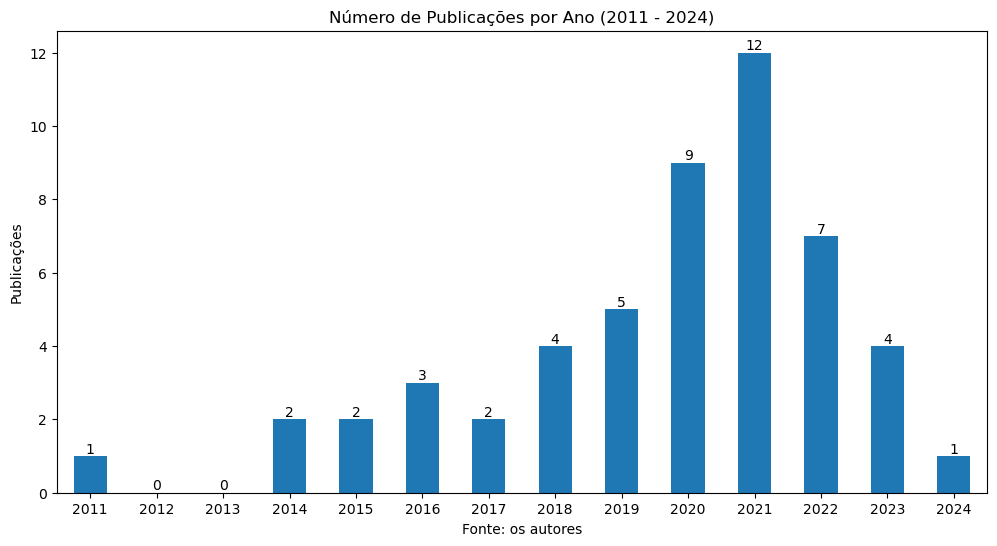

In [22]:
import matplotlib.pyplot as plt

# Criar uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar os dados nos eixos criados
yearly_counts_complete.plot(kind='bar', ax=ax)

# Configurar o título e os rótulos
ax.set_title('Número de Publicações por Ano (2011 - 2024)')
ax.set_xlabel('Fonte: os autores')
ax.set_ylabel('Publicações')
plt.xticks(rotation=0)

# Anotar cada barra com sua altura
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', 
            fontsize=10, ha='center', va='bottom')

# Mostrar o gráfico
plt.show()

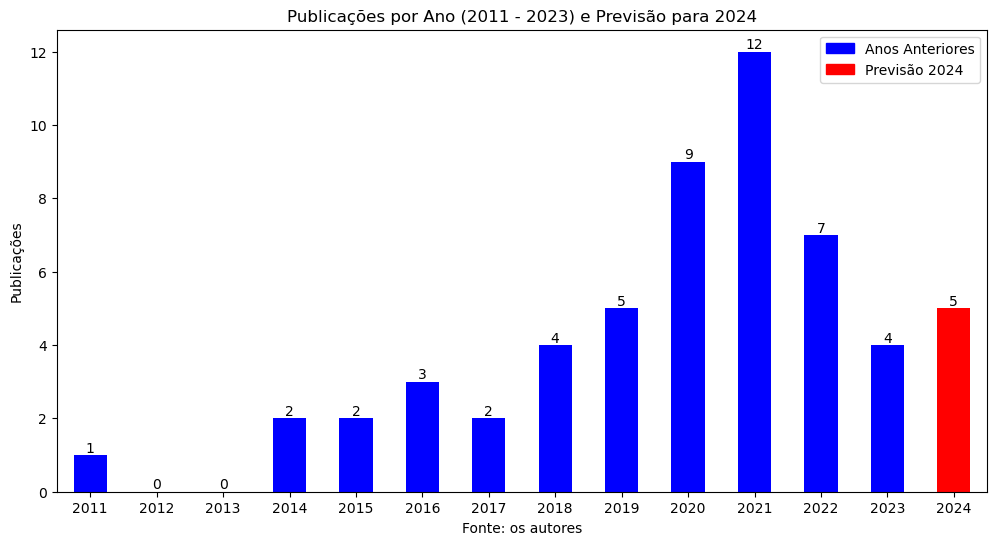

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Supondo que 'yearly_counts_complete' e 'forecast_2024' já estejam definidos

# Adiciona o valor previsto para 2024 ao dataframe
forecast_value = round(forecast_2024.iloc[0])

# Definindo diretamente o valor para o novo índice 2024
yearly_counts_with_forecast = yearly_counts_complete.copy()
yearly_counts_with_forecast[2024] = forecast_value

# Criar uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar os dados existentes nos eixos criados
yearly_counts_with_forecast.plot(kind='bar', ax=ax, color=['blue']*len(yearly_counts_with_forecast[:-1]) + ['red'])

# Configurar o título e os rótulos
ax.set_title('Publicações por Ano (2011 - 2023) e Previsão para 2024')
ax.set_xlabel('Fonte: os autores')
ax.set_ylabel('Publicações')

# Configurar os ticks do eixo X para incluir todos os anos, agora incluindo 2024
ax.set_xticks(range(len(yearly_counts_with_forecast)))
ax.set_xticklabels([str(year) for year in yearly_counts_with_forecast.index], rotation=0)

# Anotar cada barra com sua altura
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', 
            fontsize=10, ha='center', va='bottom')

# Criar patches para a legenda
patch1 = mpatches.Patch(color='blue', label='Anos Anteriores')
patch2 = mpatches.Patch(color='red', label='Previsão 2024')

# Mostrar a legenda
ax.legend(handles=[patch1, patch2])

# Mostrar o gráfico
plt.show()
